In [21]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.trainer import Trainer
import pickle

In [22]:
from test_convnet_initialize import TestConvNet_Relu, TestConvNet_Sigmoid

In [23]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=False)

# 시간이 오래 걸릴 경우 데이터를 줄인다.
x_train, t_train = x_train[:5000], t_train[:5000]
x_test, t_test = x_test[:1000], t_test[:1000]

In [24]:
test_convnet_relu_he = TestConvNet_Relu()
test_convnet_relu_xavier = TestConvNet_Relu()
test_convnet_relu_std = TestConvNet_Relu()

In [25]:
test_convnet_relu_he.load_params("test_convnet_relu_he_params.pkl")
test_convnet_relu_xavier.load_params("test_convnet_relu_xavier_params.pkl")
test_convnet_relu_std.load_params("test_convnet_relu_0.01_params.pkl")

In [26]:
print(test_convnet_relu_he.accuracy(x_test, t_test))
print(test_convnet_relu_xavier.accuracy(x_test, t_test))
print(test_convnet_relu_std.accuracy(x_test, t_test))

0.956
0.959
0.925


In [27]:
with open("trainer_relu_he.pkl", 'rb') as f:
    trainer_relu_he = pickle.load(f)
with open("trainer_relu_xavier.pkl", 'rb') as f:
    trainer_relu_xavier = pickle.load(f)
with open("trainer_relu_0.01.pkl", 'rb') as f:
    trainer_relu_std = pickle.load(f)

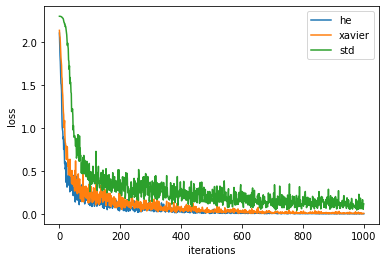

In [28]:
plt.plot(trainer_relu_he.train_loss_list, label='he')
plt.plot(trainer_relu_xavier.train_loss_list, label='xavier')
plt.plot(trainer_relu_std.train_loss_list, label='std')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

In [29]:
def show_accuracy_history(title, trainer):
    plt.title(title)
    plt.plot(trainer.train_acc_list, label='train', marker='o', markevery=2)
    plt.plot(trainer.test_acc_list, label='test', marker='s', markevery=2)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
    plt.show()

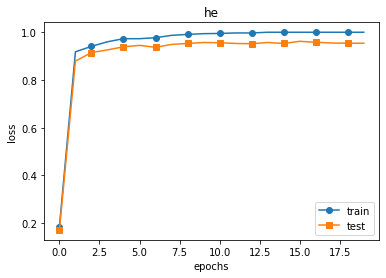

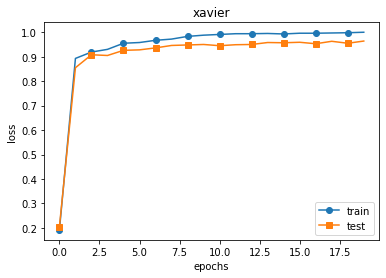

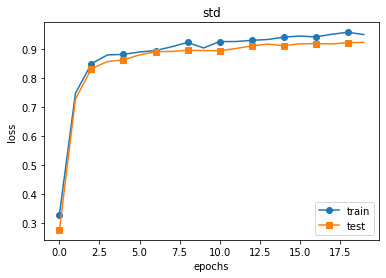

he : 0.956
xavier : 0.959
std : 0.925


In [30]:
show_accuracy_history('he',trainer_relu_he)
show_accuracy_history('xavier', trainer_relu_xavier)
show_accuracy_history('std', trainer_relu_std)

print('he : ' + str(test_convnet_relu_he.accuracy(x_test, t_test)))
print('xavier : ' + str(test_convnet_relu_xavier.accuracy(x_test, t_test)))
print('std : ' + str(test_convnet_relu_std.accuracy(x_test, t_test)))

In [35]:
test_convnet_sigmoid_he = TestConvNet_Sigmoid()
test_convnet_sigmoid_xavier = TestConvNet_Sigmoid()
test_convnet_sigmoid_std = TestConvNet_Sigmoid()

test_convnet_sigmoid_he.load_params("test_convnet_sigmoid_he_params.pkl")
test_convnet_sigmoid_xavier.load_params("test_convnet_sigmoid_xavier_params.pkl")
test_convnet_sigmoid_std.load_params("test_convnet_sigmoid_0.01_params.pkl")

with open("trainer_sigmoid_he.pkl", 'rb') as f:
    trainer_sigmoid_he = pickle.load(f)
with open("trainer_sigmoid_xavier.pkl", 'rb') as f:
    trainer_sigmoid_xavier = pickle.load(f)
with open("trainer_sigmoid_0.01.pkl", 'rb') as f:
    trainer_sigmoid_std = pickle.load(f)

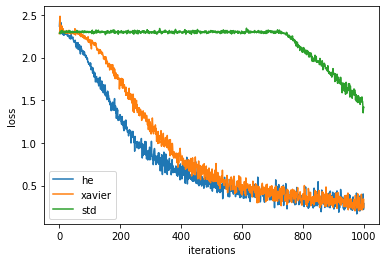

In [36]:
plt.plot(trainer_sigmoid_he.train_loss_list, label='he')
plt.plot(trainer_sigmoid_xavier.train_loss_list, label='xavier')
plt.plot(trainer_sigmoid_std.train_loss_list, label='std')
plt.xlabel("iterations")
plt.ylabel("loss")
plt.legend()
plt.show()

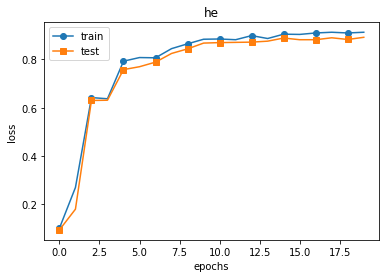

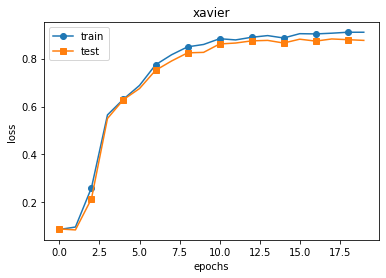

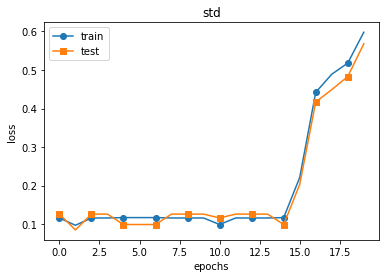

In [37]:
show_accuracy_history('he',trainer_sigmoid_he)
show_accuracy_history('xavier', trainer_sigmoid_xavier)
show_accuracy_history('std', trainer_sigmoid_std)

In [38]:
print('he : ' + str(test_convnet_sigmoid_he.accuracy(x_test, t_test)))
print('xavier : ' + str(test_convnet_sigmoid_xavier.accuracy(x_test, t_test)))
print('std : ' + str(test_convnet_sigmoid_std.accuracy(x_test, t_test)))

he : 0.894
xavier : 0.895
std : 0.623
